In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lab1_proto as proto
import lab1_tools as tool
import utils
from scipy.cluster.hierarchy import dendrogram, linkage
from lab1_tools import tidigit2labels

In [2]:
example = np.load('lab1_example.npz', allow_pickle=True)['example'].item()
data = np.load('lab1_data.npz', allow_pickle=True)['data']

In [3]:
samples = example['samples']
samples.dtype

dtype('int16')

# 4.Mel Frequency Cepstrum Coefficients step-by-step

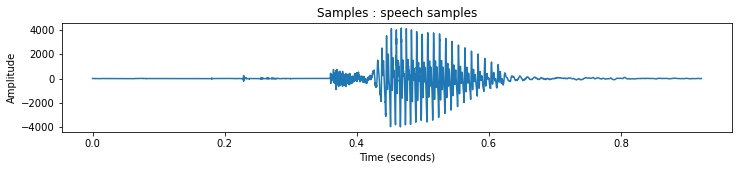

In [4]:
sr = example['samplingrate'] #20KHz
# Generate time axis in seconds
time = np.linspace(0, len(samples) / sr, num=len(samples))

# Plot the waveform
plt.figure(figsize=(12, 2))
plt.plot(time, samples)
plt.title('Samples : speech samples')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.show()

In [5]:
# Calculate window length and shift in samples given time values
winlen_time = 0.020  # Window length in seconds 
winshift_time = 0.010  # Window shift in seconds 

winlen_samples = int(winlen_time * sr)  # Convert window length to samples
winshift_samples = int(winshift_time * sr)  # Convert window shift to samples

frames = proto.enframe(samples, winlen_samples, winshift_samples)
print("Shape of frames:", frames.shape)
print("Real Shape of frames:", example["frames"].shape)


Shape of frames: (91, 400)
Real Shape of frames: (91, 400)


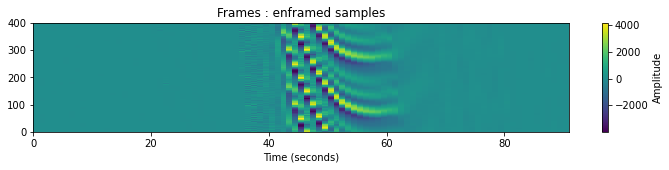

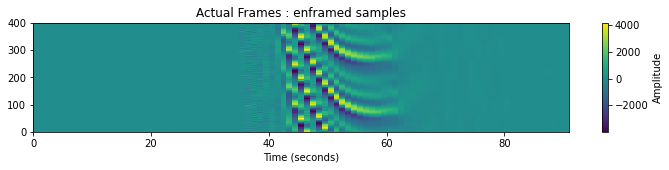

In [6]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(frames.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Frames : enframed samples')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["frames"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Frames : enframed samples')
plt.show()

In [7]:
preemph = proto.preemp(frames)

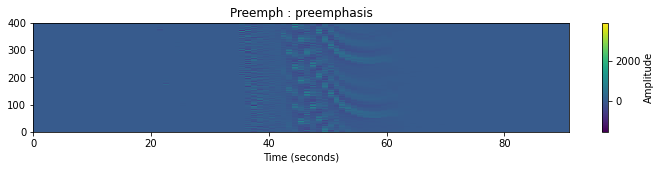

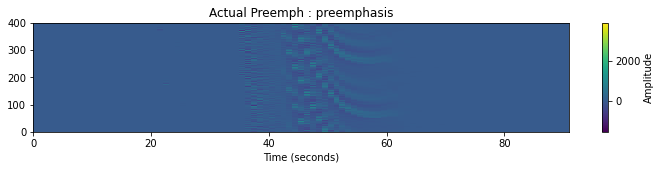

In [8]:

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(preemph.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Preemph : preemphasis')
plt.show()


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["preemph"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Preemph : preemphasis')
plt.show()

In [9]:
windowed = proto.windowing(preemph)

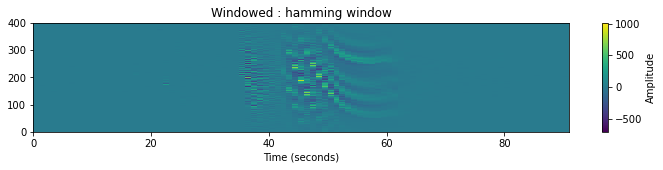

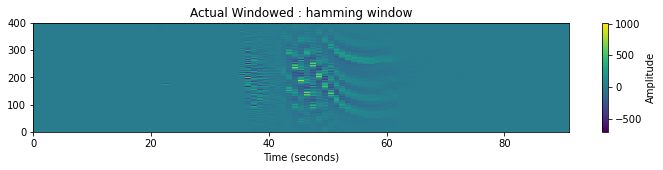

In [10]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(windowed.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Windowed : hamming window')
plt.show()


# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["windowed"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Windowed : hamming window')
plt.show()

In [11]:
spec = proto.powerSpectrum(windowed, 512)

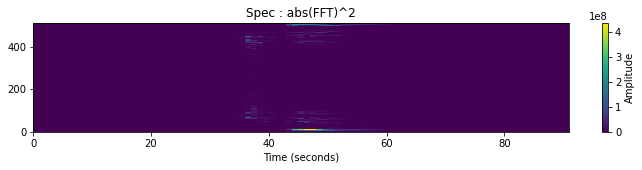

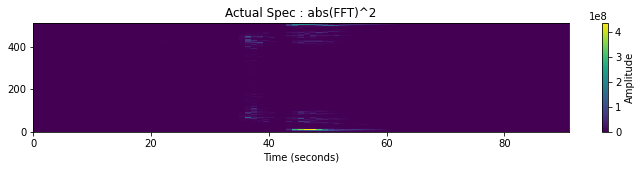

In [12]:

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(spec.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Spec : abs(FFT)^2')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["spec"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Spec : abs(FFT)^2')
plt.show()

In [13]:
mspec = proto.logMelSpectrum(spec, sr)

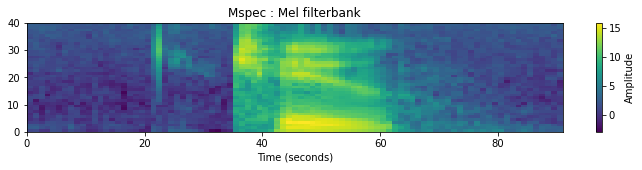

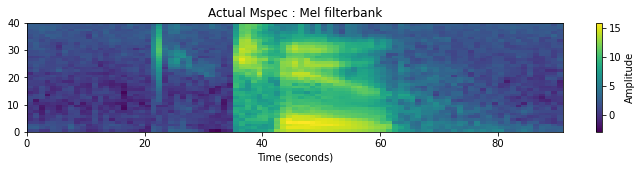

In [14]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh( mspec.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Mspec : Mel filterbank')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["mspec"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Mspec : Mel filterbank')
plt.show()

In [15]:
mfcc = proto.cepstrum(mspec, nceps=13)

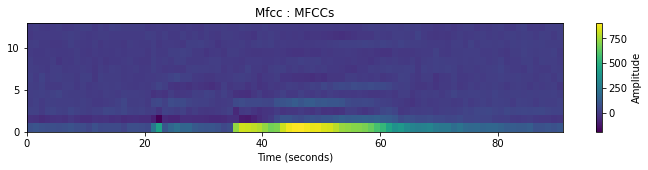

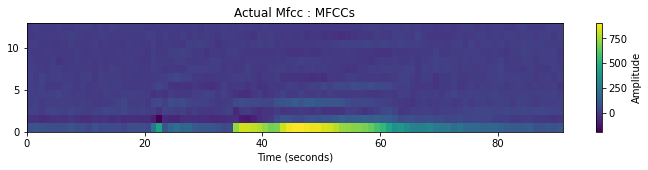

In [16]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(mfcc.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Mfcc : MFCCs')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["mfcc"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual Mfcc : MFCCs')
plt.show()

In [17]:
lmfcc = tool.lifter(mfcc, lifter=22)

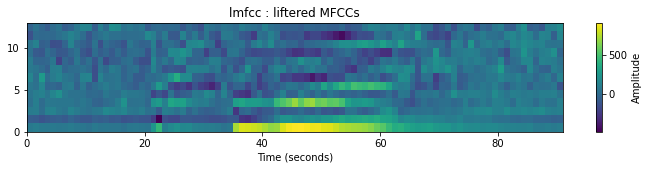

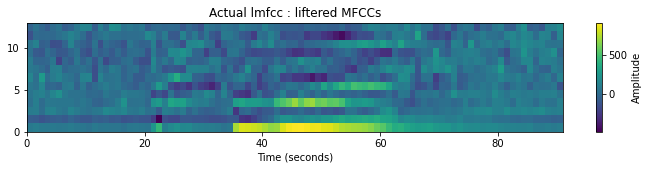

In [18]:
# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(lmfcc.T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('lmfcc : liftered MFCCs')
plt.show()

# Plotting with pcolormesh
plt.figure(figsize=(12, 2))
plt.pcolormesh(example["lmfcc"].T, cmap='viridis')
plt.colorbar(label='Amplitude')
plt.xlabel('Time (seconds)')
plt.title('Actual lmfcc : liftered MFCCs')
plt.show()

# 5.Feature Correlation

In [19]:

mfcc_feature_arr = utils.compute_mfcc_features(data)
mspec_feature_arr = utils.compute_mspec_features(data)
mfcc_correlation_matrix = utils.compute_correlation_matrix(mfcc_feature_arr)
mspec_correlation_matrix = utils.compute_correlation_matrix(mspec_feature_arr)

MFCC Feature Array shape: (3883, 13)
MSPEC Feature Array shape: (3883, 40)


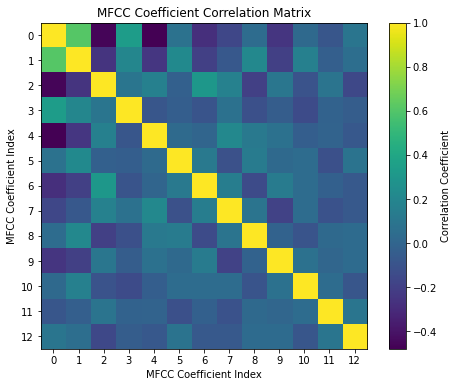

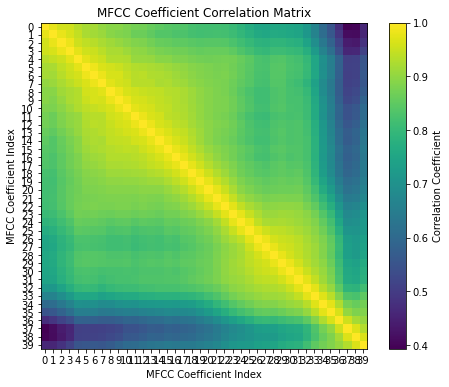

In [20]:
plt.figure(figsize=(8, 6))
plt.imshow(mfcc_correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('MFCC Coefficient Correlation Matrix')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('MFCC Coefficient Index')
plt.xticks(np.arange(13))
plt.yticks(np.arange(13))
plt.grid(False)
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(mspec_correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.title('MFCC Coefficient Correlation Matrix')
plt.xlabel('MFCC Coefficient Index')
plt.ylabel('MFCC Coefficient Index')
plt.xticks(np.arange(40))
plt.yticks(np.arange(40))
plt.grid(False)
plt.show()

# 6.Feature Correlation

In [21]:
from sklearn.mixture import GaussianMixture

gm_4 = GaussianMixture(n_components=4, random_state=0).fit(mfcc_feature_arr)
gm_8 = GaussianMixture(n_components=8, random_state=0).fit(mfcc_feature_arr)
gm_16 = GaussianMixture(n_components=16, random_state=0).fit(mfcc_feature_arr)
gm_32 = GaussianMixture(n_components=32, random_state=0).fit(mfcc_feature_arr)

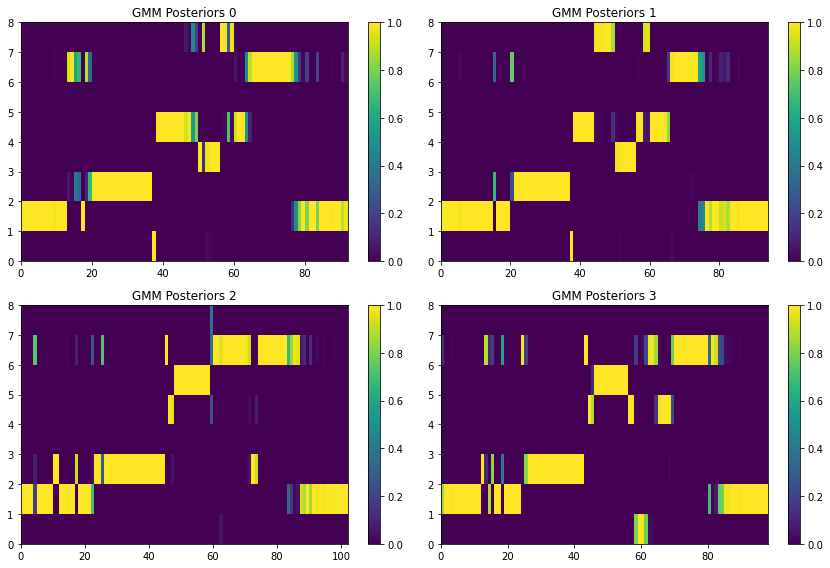

In [22]:
mffc_utterances = []
samples_indicies = [16,17,38,39]
for index in samples_indicies:
  mffc_utterances.append(proto.mfcc(data[index]["samples"]))

# Plot the GMM posteriors for each occurrence of the word "seven"
utils.gmm_visualize(gm_8, mffc_utterances)

# 7.Comparing Utterances

In [23]:
sample_1 = data[17]['samples']
sample_2 = data[16]['samples']
utils.local_dist(sample_1, sample_2).shape

(94, 92)

In [24]:
num_utterances = 44  
D = np.zeros((num_utterances, num_utterances))

for i in range(num_utterances):
    for j in range(i, num_utterances):  
        local_distances = utils.local_dist(data[i]['samples'], data[j]['samples'])
        D[i, j] = proto.dtw(local_distances)
        D[j, i] = D[i, j]

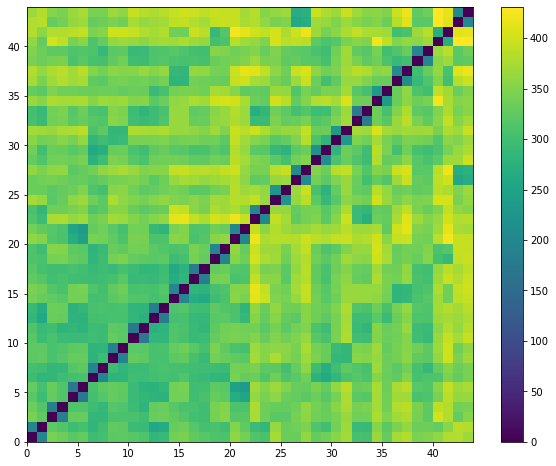

In [25]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(D, cmap='viridis')
plt.colorbar()
plt.show()

/tmp/ipykernel_1117516/1260899097.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(D, 'complete')


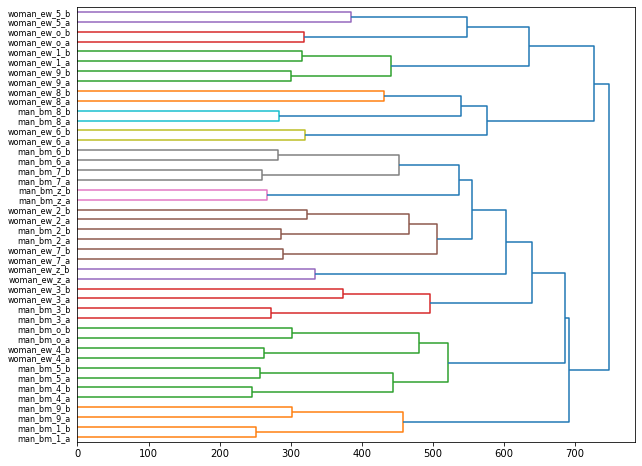

In [26]:
labels = tidigit2labels(data)  # Generate labels for dendrogram

Z = linkage(D, 'complete')
plt.figure(figsize=(10, 8))
dendrogram(Z, labels=labels, orientation='right')
plt.show()